### Sensibilidad al Error en las Observaciones

Figure saved as: 
 PDF: /media/jgacitua/storage/L96_multiple_experiments/figures/Figure_ObsError_Sensitivity_Nens20_Freq4_Den0.5_Type3_PTemp2_NOGEC.pdf 
 PNG: /media/jgacitua/storage/L96_multiple_experiments/figures/Figure_ObsError_Sensitivity_Nens20_Freq4_Den0.5_Type3_PTemp2_NOGEC.png


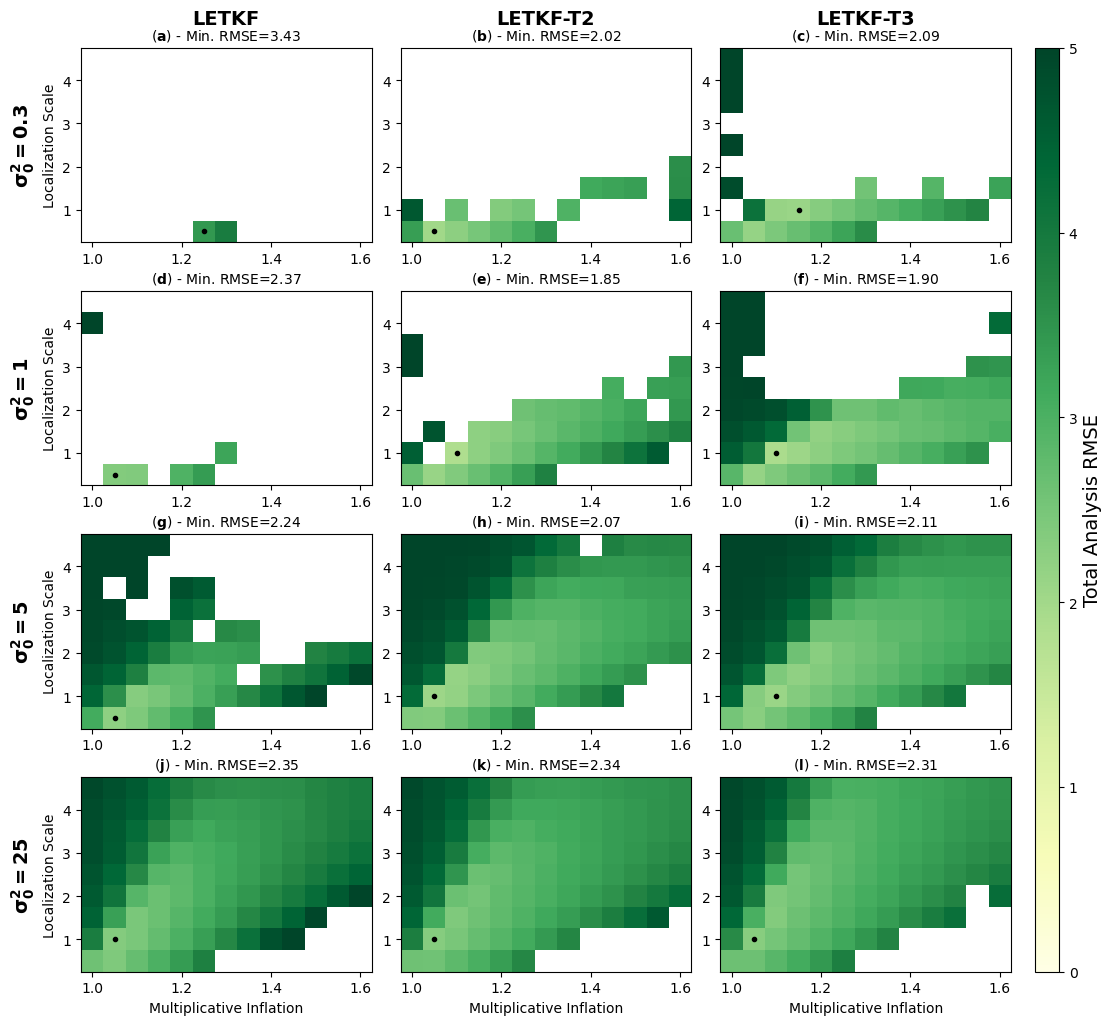

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import os
import common_function as cf
# Configuración
obs_errs = ['0.3', '1', '5', '25']
ntemps = [1, 2, 3]
labels = ['LETKF', 'LETKF-T2', 'LETKF-T3']

base_path  = r'/media/jgacitua/storage/L96_multiple_experiments/data/LETKF'
output_dir = r'/media/jgacitua/storage/L96_multiple_experiments/figures'
nens = 20
freq = 4
den = 0.5
alpha = 2
gec = '_NOGEC'
fig, axes = plt.subplots(len(obs_errs), len(ntemps), figsize=(12, 12), 
                         sharex=False, sharey=False, 
                         gridspec_kw={'hspace': 0.25, 'wspace': 0.1})


cbar_ax = fig.add_axes([0.92, 0.11, 0.02, 0.77])  # x, y, width, height

vmin, vmax = 0, 5
panel_label_counter = 0

for i, obs in enumerate(obs_errs):
    for j, ntemp in enumerate(ntemps):
        #filename = f'ORIG_LETKF_Paper_Nature_Freq{freq}_Den{den}_Type3_ObsErr{obs}_Nens20_NTemp{ntemp}{gec}.npz'
        filename = f'LETKF_Paper_Nature_Freq{freq}_Den{den}_Type3_ObsErr{obs}_Nens{nens}_NTemp{ntemp}_alpha{alpha}{gec}.npz'
        filepath = os.path.join(base_path, filename)

        ax = axes[i, j]

        if os.path.exists(filepath):
            data = np.load(filepath, allow_pickle=True)
            #results = data['results']
            mult_inf_range = data['mult_inf_range']
            loc_scale_range = data['loc_scale_range']
            #print(data['AlphaTempList'])
            total_analysis_rmse = data['total_analysis_rmse']

            NormalEnd = 1 - data['NormalEnd']
            NormalEnd = NormalEnd.astype(bool)
            total_analysis_rmse[NormalEnd] = np.nan
            total_analysis_rmse = cf.outlier_rmse_filter( total_analysis_rmse )

            min_rmse = np.nanmin(total_analysis_rmse)
            idx_min = np.where(total_analysis_rmse == min_rmse)
            best_mult_inf = mult_inf_range[idx_min[0][0]]
            best_loc_scale = loc_scale_range[idx_min[1][0]]
 
            im = ax.pcolormesh(mult_inf_range, loc_scale_range, total_analysis_rmse.T, 
                               vmin=vmin, vmax=vmax, cmap='YlGn',edgecolors='lightgray',linewidth=0.001)
            ax.plot(best_mult_inf, best_loc_scale, 'k.', markersize=6)

            panel_label = rf"$\bf{{{chr(97 + panel_label_counter)}}}$"
            ax.set_title(f"({panel_label}) - Min. RMSE={min_rmse:.2f}", fontsize=10)
            panel_label_counter += 1

            if j == 0:
                ax.set_ylabel('Localization Scale', fontsize=10)
            if i == len(obs_errs) - 1:
                ax.set_xlabel('Multiplicative Inflation', fontsize=10)

for i, obs in enumerate(obs_errs):
    axes[i, 0].annotate(rf"$\bf{{\sigma^2_0 = {obs}}}$", xy=(-0.15, 0.5), xycoords='axes fraction',
                        rotation=90, va='center', ha='right', fontsize=14, weight='bold')
for j, t in enumerate(ntemps):
    axes[0, j].annotate(labels[j], xy=(0.5, 1.15), xycoords='axes fraction',
                        va='center', ha='center', fontsize=14, weight='bold')
cbar = fig.colorbar(im, cax=cbar_ax)
cbar.set_label('Total Analysis RMSE', fontsize=14)

os.makedirs(output_dir, exist_ok=True)
figname = f"Figure_ObsError_Sensitivity_Nens{nens}_Freq{freq}_Den{den}_Type3_PTemp{alpha}{gec}"
output_pdf = os.path.join(output_dir, f"{figname}.pdf")
output_png = os.path.join(output_dir, f"{figname}.png")

plt.savefig(output_pdf, dpi=300, bbox_inches='tight', format='pdf')
plt.savefig(output_png, dpi=300, bbox_inches='tight', format='png')
#plt.show()

print(f"Figure saved as: \n PDF: {output_pdf} \n PNG: {output_png}")

### Sensibilidad al numero de Ensambles

Figure saved as: 
 PDF: /media/jgacitua/storage/L96_multiple_experiments/figures/Figure_Nens_Sensitivity_Freq4_Den0.5_Type3_PTemp2_ObsErr5_NOGEC.pdf 
 PNG: /media/jgacitua/storage/L96_multiple_experiments/figures/Figure_Nens_Sensitivity_Freq4_Den0.5_Type3_PTemp2_ObsErr5_NOGEC.png


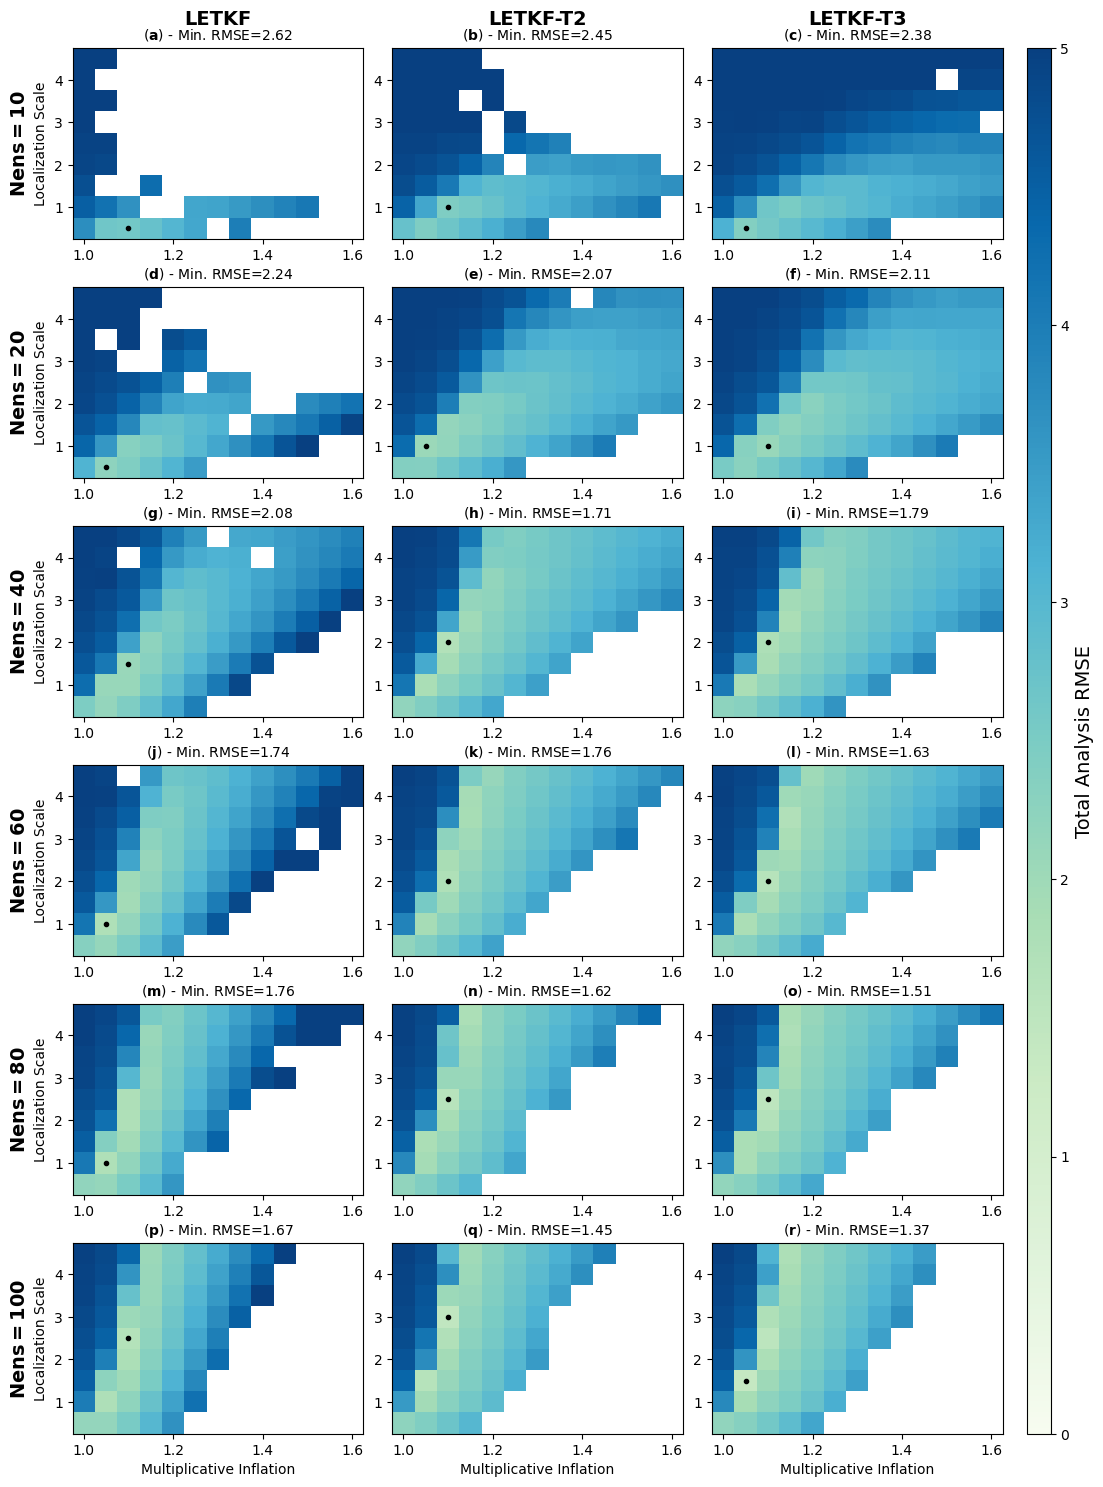

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import os
import common_function as cf
# Configuración
ntemps = [1, 2, 3]
labels = ['LETKF', 'LETKF-T2', 'LETKF-T3']
nens = [10, 20, 40, 60, 80, 100]
base_path  = r'/media/jgacitua/storage/L96_multiple_experiments/data/LETKF'
output_dir = r'/media/jgacitua/storage/L96_multiple_experiments/figures'
freq = 4
den = 0.5
alpha = 2
ObseErr = '5'
gec = 'NOGEC'
fig, axes = plt.subplots(len(nens), len(ntemps), figsize=(12, 18), 
                         sharex=False, sharey=False, 
                         gridspec_kw={'hspace': 0.25, 'wspace': 0.1})


cbar_ax = fig.add_axes([0.92, 0.11, 0.02, 0.77])  # x, y, width, height

vmin, vmax = 0, 5
panel_label_counter = 0

for i, nen in enumerate(nens):
    for j, ntemp in enumerate(ntemps):
        filename = f'LETKF_Paper_Nature_Freq{freq}_Den{den}_Type3_ObsErr{ObseErr}_Nens{nen}_NTemp{ntemp}_alpha{alpha}_{gec}.npz'
        filepath = os.path.join(base_path, filename)
        #print(filepath)

        if os.path.exists(filepath):
            data = np.load(filepath, allow_pickle=True)
            #results = data['results']
            mult_inf_range = data['mult_inf_range']
            loc_scale_range = data['loc_scale_range']

            ax = axes[i, j]
            total_analysis_rmse = data['total_analysis_rmse']
            NormalEnd = 1 - data['NormalEnd']
            NormalEnd = NormalEnd.astype(bool)
            total_analysis_rmse[NormalEnd] = np.nan
            total_analysis_rmse = cf.outlier_rmse_filter( total_analysis_rmse )
            min_rmse = np.nanmin(total_analysis_rmse)
            idx_min = np.where(total_analysis_rmse == min_rmse)
            best_mult_inf = mult_inf_range[idx_min[0][0]]
            best_loc_scale = loc_scale_range[idx_min[1][0]]

            im = ax.pcolormesh(mult_inf_range, loc_scale_range, total_analysis_rmse.T, 
                                vmin=vmin, vmax=vmax, cmap='GnBu',edgecolors='lightgray',linewidth=0.001)
            ax.plot(best_mult_inf, best_loc_scale, 'k.', markersize=6)

            panel_label = rf"$\bf{{{chr(97 + panel_label_counter)}}}$"
            ax.set_title(f"({panel_label}) - Min. RMSE={min_rmse:.2f}", fontsize=10)
            panel_label_counter += 1

            if j == 0:
                ax.set_ylabel('Localization Scale', fontsize=10)
            if i == len(nens) - 1:
                ax.set_xlabel('Multiplicative Inflation', fontsize=10)

for i, nen in enumerate(nens):
    axes[i, 0].annotate(rf"$\bf{{Nens = {nen}}}$", xy=(-0.15, 0.5), xycoords='axes fraction',
                        rotation=90, va='center', ha='right', fontsize=14, weight='bold')
for j, t in enumerate(ntemps):
    axes[0, j].annotate(labels[j], xy=(0.5, 1.15), xycoords='axes fraction',
                        va='center', ha='center', fontsize=14, weight='bold')
cbar = fig.colorbar(im, cax=cbar_ax)
cbar.set_label('Total Analysis RMSE', fontsize=14)

os.makedirs(output_dir, exist_ok=True)
figname = f"Figure_Nens_Sensitivity_Freq{freq}_Den{den}_Type3_PTemp{alpha}_ObsErr{ObseErr}_{gec}"
output_pdf = os.path.join(output_dir, f"{figname}.pdf")
output_png = os.path.join(output_dir, f"{figname}.png")

plt.savefig(output_pdf, dpi=300, bbox_inches='tight', format='pdf')
plt.savefig(output_png, dpi=300, bbox_inches='tight', format='png')
#plt.show()

print(f"Figure saved as: \n PDF: {output_pdf} \n PNG: {output_png}")

Figure saved as: 
 PDF: /media/jgacitua/storage/L96_multiple_experiments/figures/Figure_Alpha_Sensitivity_Freq4_Den1.0_Type3_nens20_ObsErr5_NOGEC.pdf 
 PNG: /media/jgacitua/storage/L96_multiple_experiments/figures/Figure_Alpha_Sensitivity_Freq4_Den1.0_Type3_nens20_ObsErr5_NOGEC.png


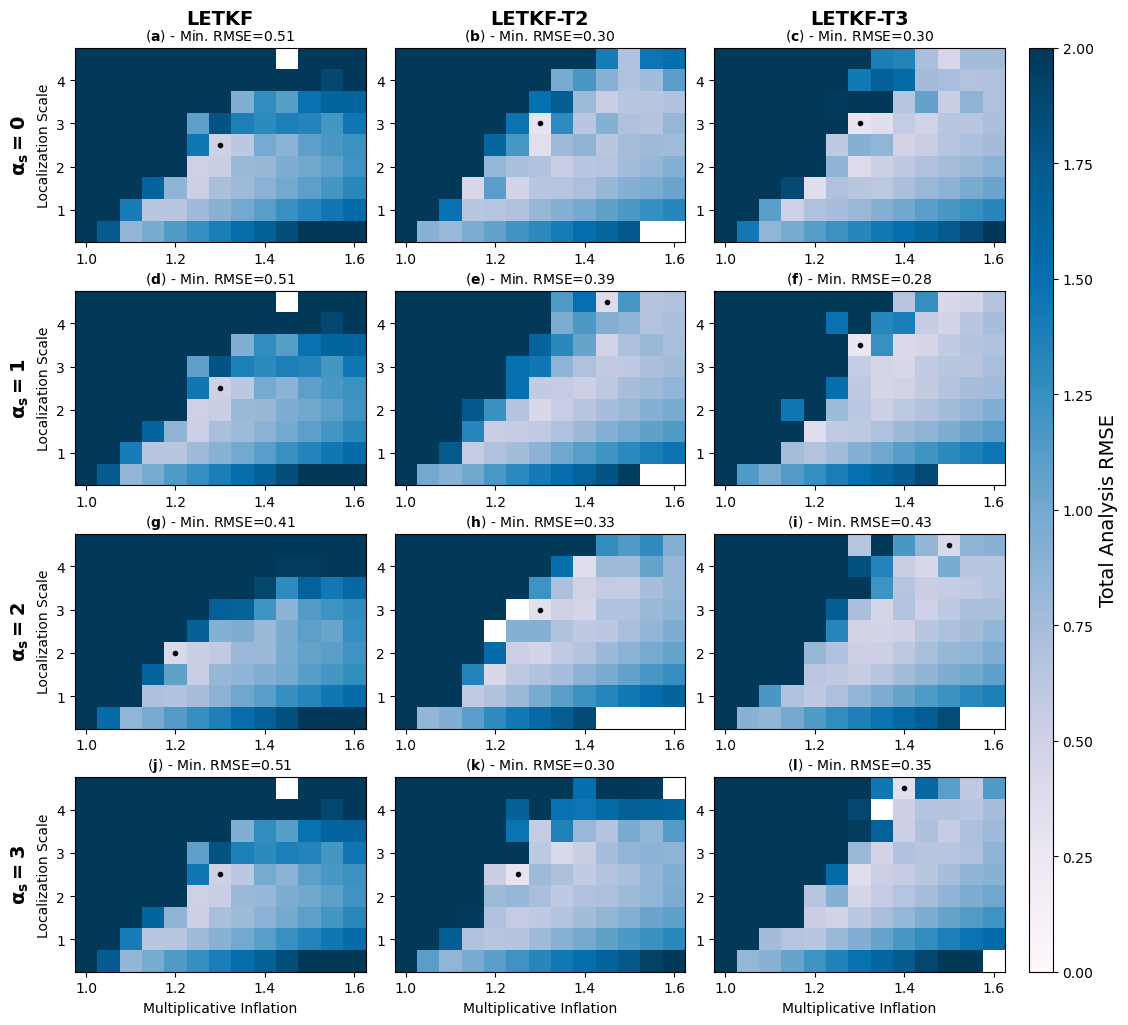

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import os
import common_function as cf
# Configuración

base_path  = r'/media/jgacitua/storage/L96_multiple_experiments/data/LETKF'
output_dir = r'/media/jgacitua/storage/L96_multiple_experiments/figures'
ntemps = [1, 2, 3]
labels = ['LETKF', 'LETKF-T2', 'LETKF-T3']
freq = 4
den = 1.0
alphas = [0,1,2,3]
nen = 20
ObseErr = '5'
gec = '_NOGEC'
fig, axes = plt.subplots(len(alphas), len(ntemps), figsize=(12, 12), 
                         sharex=False, sharey=False, 
                         gridspec_kw={'hspace': 0.25, 'wspace': 0.1})

cbar_ax = fig.add_axes([0.92, 0.11, 0.02, 0.77])  # x, y, width, height
vmin, vmax = 0, 2
panel_label_counter = 0

for i, alpha in enumerate(alphas):
    for j, ntemp in enumerate(ntemps):
        # Load the data
        filename = f'LETKF_Paper_Nature_Freq{freq}_Den{den}_Type3_ObsErr{ObseErr}_Nens{nen}_NTemp{ntemp}_alpha{alpha}{gec}.npz'
        filepath = os.path.join(base_path, filename)
        #print(filepath)
        # Check if the file exists
        if os.path.exists(filepath):
            ax = axes[i, j]
            data = np.load(filepath, allow_pickle=True)
            mult_inf_range = data['mult_inf_range']
            loc_scale_range = data['loc_scale_range']
            total_analysis_rmse = data['total_analysis_rmse']

            NormalEnd = 1 - data['NormalEnd']
            NormalEnd = NormalEnd.astype(bool)
            total_analysis_rmse[NormalEnd] = np.nan
            total_analysis_rmse = cf.outlier_rmse_filter( total_analysis_rmse )

            min_rmse = np.nanmin(total_analysis_rmse)
            idx_min = np.where(total_analysis_rmse == min_rmse)
            best_mult_inf = mult_inf_range[idx_min[0][0]]
            best_loc_scale = loc_scale_range[idx_min[1][0]]

            im = ax.pcolormesh(mult_inf_range, loc_scale_range, total_analysis_rmse.T, 
                                vmin=vmin, vmax=vmax, cmap='PuBu',edgecolors='lightgray',linewidth=0.001)
            ax.plot(best_mult_inf, best_loc_scale, 'k.', markersize=6)

            panel_label = rf"$\bf{{{chr(97 + panel_label_counter)}}}$"
            ax.set_title(f"({panel_label}) - Min. RMSE={min_rmse:.2f}", fontsize=10)
            panel_label_counter += 1

            if j == 0:
                ax.set_ylabel('Localization Scale', fontsize=10)
            if i == len(alphas) - 1:
                ax.set_xlabel('Multiplicative Inflation', fontsize=10)

for i, alpha in enumerate(alphas):
    axes[i, 0].annotate(rf"$\bf{{\alpha_s = {alpha}}}$", xy=(-0.15, 0.5), xycoords='axes fraction',
                        rotation=90, va='center', ha='right', fontsize=14, weight='bold')
for j, t in enumerate(ntemps):
    axes[0, j].annotate(labels[j], xy=(0.5, 1.15), xycoords='axes fraction',
                        va='center', ha='center', fontsize=14, weight='bold')
cbar = fig.colorbar(im, cax=cbar_ax)
cbar.set_label('Total Analysis RMSE', fontsize=14)

os.makedirs(output_dir, exist_ok=True)
figname = f"Figure_Alpha_Sensitivity_Freq{freq}_Den{den}_Type3_nens{nen}_ObsErr{ObseErr}{gec}"
output_pdf = os.path.join(output_dir, f"{figname}.pdf")
output_png = os.path.join(output_dir, f"{figname}.png")

plt.savefig(output_pdf, dpi=300, bbox_inches='tight', format='pdf')
plt.savefig(output_png, dpi=300, bbox_inches='tight', format='png')
#plt.show()

print(f"Figure saved as: \n PDF: {output_pdf} \n PNG: {output_png}")

In [6]:
from scipy.ndimage import generic_filter

def strict_nanmean_filter(arr, size=3):
    def filter_func(window):
        if np.isnan(window).any():
            return np.nan
        return np.mean(window)

    # Apply the filter with a footprint of size x size
    return generic_filter(arr, function=filter_func, size=size, mode='nearest')


In [46]:
Freq = 4
Den = 1.0
ObseErr = '5'
nens_labels = np.array([10, 20, 40, 60,80,100])
alpha_range = np.array([0, 1, 2, 3])
n_alpha = len(alpha_range)
n_nens = len(nens_labels)
best_inflation = np.empty((n_nens, n_alpha, 3))  # 3 methods: LETKF, T2, T3
best_localization = np.empty((n_nens, n_alpha, 3))

for k, method_idx in enumerate([0, 1, 2]):  # LETKF, T2, T3
    for iens, nens in enumerate(nens_labels):
        for ialpha, alpha in enumerate(alpha_range):
            filename = f"LETKF_Paper_Nature_Freq{Freq}_Den{Den}_Type3_ObsErr{ObseErr}_Nens{nens}_NTemp{method_idx+1}_alpha{alpha}_NOGEC.npz"
            filepath = os.path.join(base_path, filename)

            if os.path.exists(filepath):
                data = np.load(filepath, allow_pickle=True)
                rmse = data['total_analysis_rmse']
                NormalEnd = 1 - data['NormalEnd']
                NormalEnd = NormalEnd.astype(bool)
                rmse[NormalEnd] = np.nan
                rmse = cf.outlier_rmse_filter(rmse)

                # Apply smoothing
                rmse_smooth = strict_nanmean_filter(rmse, size=3)
                min_idx = np.nanargmin(rmse_smooth)
                inf_idx, loc_idx = np.unravel_index(min_idx, rmse_smooth.shape)

                best_inflation[iens, ialpha, k] = data['mult_inf_range'][inf_idx]
                best_localization[iens, ialpha, k] = data['loc_scale_range'][loc_idx]
            else:
                best_inflation[iens, ialpha, k] = np.nan
                best_localization[iens, ialpha, k] = np.nan

Figure saved as: 
 PDF: /media/jgacitua/storage/L96_multiple_experiments/figures/Figure_Alpha_nens_Sensitivity_Freq4_Den1.0_Type3_nens_ObsErr5_NOGEC.pdf 
 PNG: /media/jgacitua/storage/L96_multiple_experiments/figures/Figure_Alpha_nens_Sensitivity_Freq4_Den1.0_Type3_nens_ObsErr5_NOGEC.png


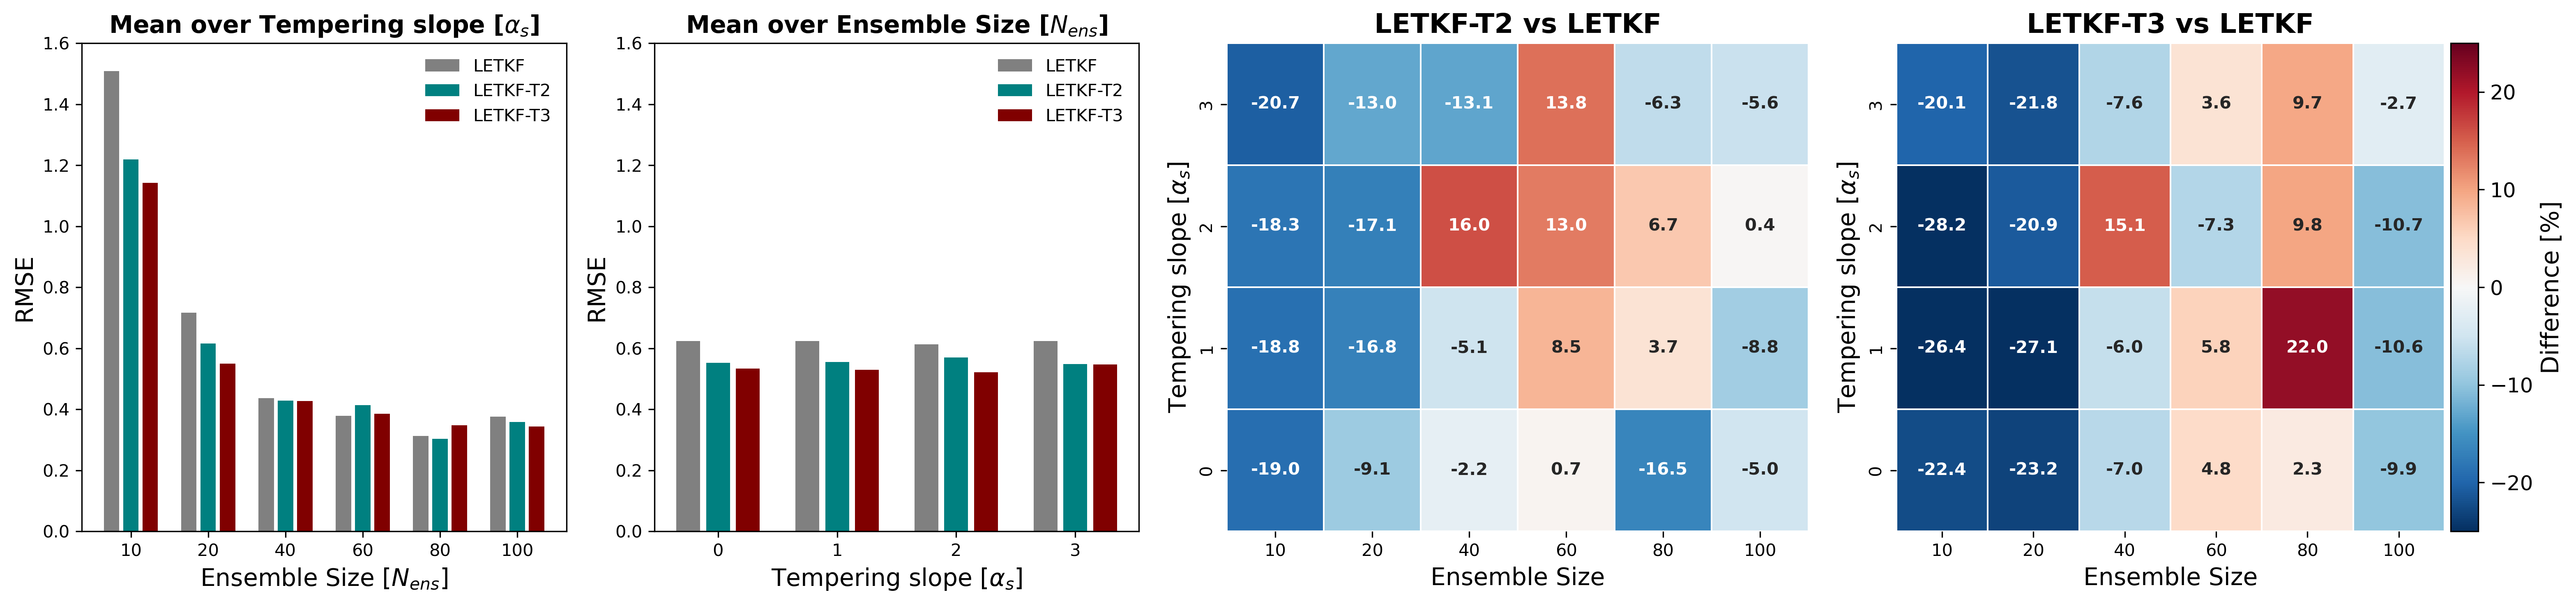

In [71]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os
import common_function as cf

Freq = 4
Den = 1.0
ObseErr = 5

base_path  = r'/media/jgacitua/storage/L96_multiple_experiments/data/LETKF'
output_dir = r'/media/jgacitua/storage/L96_multiple_experiments/figures'

filename = f'rmse_values_smooth_frec{Freq}_den{Den}_obs{ObseErr}.npz'
rmse_values_smooth = np.load(os.path.join(base_path, filename))['rmse_values']

# Assume you already loaded rmse_values_smooth: [n_ens, n_alpha, n_temp]
nens_labels = np.array([10, 20, 40, 60,80,100])
alpha_range = np.array([0, 1, 2, 3])

# Extract LETKF (n_temp = 0), LETKF-T2 (n_temp = 1), LETKF-T3 (n_temp = 2)
letkf      = rmse_values_smooth[:, :, 0]  # shape: (nens, alpha)
letkf_t2   = rmse_values_smooth[:, :, 1]
letkf_t3   = rmse_values_smooth[:, :, 2]

# Calculate % change relative to LETKF
pct_t2 = ((letkf_t2 - letkf) / letkf) * 100
pct_t3 = ((letkf_t3 - letkf) / letkf) * 100

# Set up 3-panel figure
fig, axes = plt.subplots(1, 4, figsize=(21, 5), dpi=300 ,gridspec_kw={'width_ratios': [1, 1, 1.2, 1.2]})

# Panel 1 – LETKF baseline (as horizontal bar since values are alpha-independent)
mean_rmse_letkf = np.mean(letkf, axis=1)  # Take mean across alpha
mean_rmse_letkf_t2 = np.mean(letkf_t2, axis=1)  # Take mean across alpha
mean_rmse_letkf_t3 = np.mean(letkf_t3, axis=1)  # Take mean across alpha
axes[0].bar(np.arange(len(nens_labels))*4, mean_rmse_letkf, color='gray',label='LETKF')
axes[0].bar(np.arange(len(nens_labels))*4+1, mean_rmse_letkf_t2, color='Teal',label='LETKF-T2')
axes[0].bar(np.arange(len(nens_labels))*4+2, mean_rmse_letkf_t3, color='Maroon',label='LETKF-T3')
axes[0].set_xticks(np.arange(len(nens_labels))*4+1)
axes[0].set_xticklabels(nens_labels)
#axes[0].invert_yaxis()
axes[0].set_ylabel("RMSE", fontsize=14)
axes[0].set_title(r"Mean over Tempering slope [$\alpha_s$]", fontsize=14, fontweight='bold')
axes[0].set_xlabel(r"Ensemble Size [$N_{ens}$]", fontsize=14)
axes[0].set_ylim(0, 1.6)
axes[0].legend(loc='upper right', fontsize=10, frameon=False)

# Panel 2 – LETKF baseline (as horizontal bar since values are alpha-independent)
mean_rmse_letkf = np.mean(letkf, axis=0)  # Take mean across alpha
mean_rmse_letkf_t2 = np.mean(letkf_t2, axis=0)  # Take mean across alpha
mean_rmse_letkf_t3 = np.mean(letkf_t3, axis=0)  # Take mean across alpha
axes[1].bar(np.arange(len(alpha_range))*4, mean_rmse_letkf, color='gray',label='LETKF')
axes[1].bar(np.arange(len(alpha_range))*4+1, mean_rmse_letkf_t2, color='Teal',label='LETKF-T2')
axes[1].bar(np.arange(len(alpha_range))*4+2, mean_rmse_letkf_t3, color='Maroon',label='LETKF-T3')
axes[1].set_xticks(np.arange(len(alpha_range))*4+1)
axes[1].set_xticklabels(alpha_range)
#axes[0].invert_yaxis()
axes[1].set_ylabel("RMSE", fontsize=14)
axes[1].set_title(r"Mean over Ensemble Size [$N_{ens}$]", fontsize=14, fontweight='bold')
axes[1].set_xlabel(r"Tempering slope [$\alpha_s$]", fontsize=14)
axes[1].set_ylim(0, 1.6)
axes[1].legend(loc='upper right', fontsize=10, frameon=False)

# Common settings for heatmaps
vmin, vmax = -25, 25  # Adjust based on range of your % differences

# Panel 3 – % change LETKF-T2 vs LETKF
hm_t2=sns.heatmap(pct_t2.T, annot=True, fmt=".1f", cmap="RdBu_r", center=0,
            vmin=vmin, vmax=vmax, xticklabels=nens_labels, yticklabels=alpha_range,
            ax=axes[2], cbar=False,cbar_kws={"label": "Difference [%]"}, linewidth=.5, annot_kws={"fontsize": 10,"fontweight": "bold"})
#hm_t2.collections[0].colorbar.ax.yaxis.label.set_size(14)   # Colorbar label
axes[2].set_title("LETKF-T2 vs LETKF", fontsize=16, fontweight='bold')
axes[2].set_xlabel("Ensemble Size", fontsize=14)
axes[2].set_ylabel(r"Tempering slope [$\alpha_s$]", fontsize=14)
axes[2].invert_yaxis()
# Panel 4 – % change LETKF-T3 vs LETKF
hm_t3=sns.heatmap(pct_t3.T, annot=True, fmt=".1f", cmap="RdBu_r", center=0,
            vmin=vmin, vmax=vmax, xticklabels=nens_labels, yticklabels=alpha_range,
            ax=axes[3],cbar=False, cbar_kws={"label": "Difference [%]"}, linewidth=.5, annot_kws={"fontsize": 10,"fontweight": "bold"})
#hm_t3.collections[0].colorbar.ax.yaxis.label.set_size(14)   # Colorbar label
axes[3].set_title("LETKF-T3 vs LETKF", fontsize=16, fontweight='bold')
axes[3].set_xlabel("Ensemble Size", fontsize=14)
axes[3].set_ylabel(r"Tempering slope [$\alpha_s$]", fontsize=14)
axes[3].invert_yaxis()
# Layout adjustment
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Use a divider to create a new axis for the colorbar
divider = make_axes_locatable(axes[3])
cax = divider.append_axes("right", size="5%", pad=0.05)

# Add colorbar to the new axis using one of the heatmap mappables
cbar = fig.colorbar(hm_t3.collections[0], cax=cax)
cbar.set_label("Difference [%]", fontsize=14)
cbar.ax.tick_params(labelsize=12)

plt.tight_layout()
os.makedirs(output_dir, exist_ok=True)
figname = f"Figure_Alpha_nens_Sensitivity_Freq{freq}_Den{Den}_Type3_nens_ObsErr{ObseErr}{gec}"
output_pdf = os.path.join(output_dir, f"{figname}.pdf")
output_png = os.path.join(output_dir, f"{figname}.png")

plt.savefig(output_pdf, dpi=300, bbox_inches='tight', format='pdf')
plt.savefig(output_png, dpi=300, bbox_inches='tight', format='png')
#plt.show()

print(f"Figure saved as: \n PDF: {output_pdf} \n PNG: {output_png}")
plt.show()


/tmp/ipykernel_42526/3573185755.py:57: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.91, 1])  # Leave space for colorbars


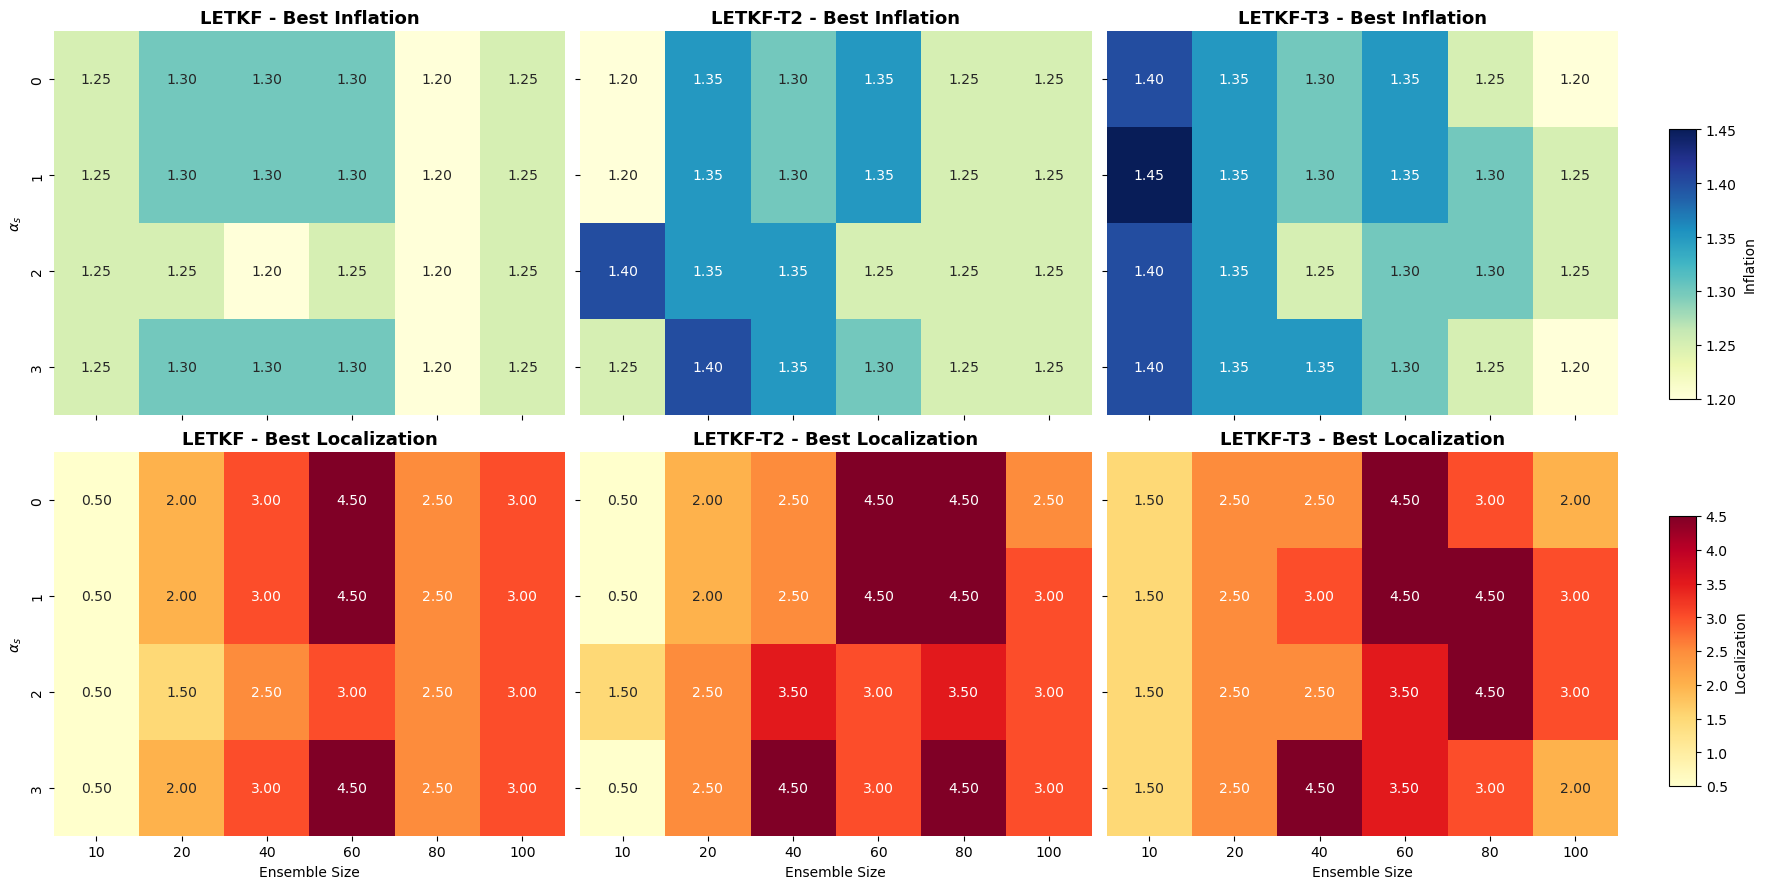

In [47]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Example labels
nens_labels = [10, 20, 40, 60,80,100]
alpha_range = [0, 1, 2, 3]
methods = ['LETKF', 'LETKF-T2', 'LETKF-T3']

# Dummy best values (replace with your calculated values)
#np.random.seed(1)
#best_inflation = np.random.uniform(0.5, 2.0, size=(len(nens_labels), len(alpha_range), 3))
#best_localization = np.random.uniform(0.1, 1.0, size=(len(nens_labels), len(alpha_range), 3))

# Create the figure and axes
fig, axes = plt.subplots(2, 3, figsize=(18, 9), sharex=True, sharey=True)

# Prepare shared colorbars
inflation_cbar_ax = fig.add_axes([0.93, 0.55, 0.015, 0.3])   # x, y, width, height
localization_cbar_ax = fig.add_axes([0.93, 0.12, 0.015, 0.3])

# Define ranges for consistent color scale
vmin_inf = np.min(best_inflation)
vmax_inf = np.max(best_inflation)
vmin_loc = np.min(best_localization)
vmax_loc = np.max(best_localization)

# Plot Inflation (top row)
for k, method in enumerate(methods):
    ax = axes[0, k]
    data = best_inflation[:, :, k]
    hm = sns.heatmap(data.T, annot=True, fmt=".2f", cmap="YlGnBu",
                     xticklabels=nens_labels, yticklabels=alpha_range,
                     ax=ax, vmin=vmin_inf, vmax=vmax_inf, cbar=False)
    ax.set_title(f"{method} - Best Inflation", fontsize=13, fontweight='bold')
    if k == 0:
        ax.set_ylabel(r"$\alpha_s$")

# Plot shared inflation colorbar
fig.colorbar(hm.get_children()[0], cax=inflation_cbar_ax, label="Inflation")

# Plot Localization (bottom row)
for k, method in enumerate(methods):
    ax = axes[1, k]
    data = best_localization[:, :, k]
    hm = sns.heatmap(data.T, annot=True, fmt=".2f", cmap="YlOrRd",
                     xticklabels=nens_labels, yticklabels=alpha_range,
                     ax=ax, vmin=vmin_loc, vmax=vmax_loc, cbar=False)
    ax.set_title(f"{method} - Best Localization", fontsize=13, fontweight='bold')
    ax.set_xlabel("Ensemble Size")
    if k == 0:
        ax.set_ylabel(r"$\alpha_s$")

# Plot shared localization colorbar
fig.colorbar(hm.get_children()[0], cax=localization_cbar_ax, label="Localization")

plt.tight_layout(rect=[0, 0, 0.91, 1])  # Leave space for colorbars
plt.show()